In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing Models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
# Import Evaluation Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

In [2]:
df = pd.read_csv('Heart_Disease.csv',na_values='?')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
df['num'].value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [10]:
target=df['num'].copy()

In [11]:
target[target>0]=1

In [12]:
df=df.drop('num',axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [13]:
df['target']=target
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [15]:
x=df.drop(['target'],axis=1)
y=df['target']

In [16]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [17]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: target, Length: 297, dtype: int64

In [18]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [19]:
y_test

189    1
258    0
295    0
96     1
148    0
225    0
231    1
146    1
77     0
240    0
200    0
42     0
38     1
135    0
80     0
132    0
178    0
123    1
43     0
269    0
22     1
114    1
196    0
72     1
98     0
51     0
30     0
201    0
92     0
260    0
156    1
46     0
151    0
74     1
94     0
276    0
279    0
90     0
73     1
272    1
82     0
300    1
63     0
242    0
172    1
222    0
185    0
221    0
203    0
153    1
286    1
211    1
235    1
86     0
140    0
291    0
152    0
212    0
147    0
18     0
Name: target, dtype: int64

# Logistic Regression

In [20]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [21]:
model.score(X_test,y_test)

0.8666666666666667

In [22]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [23]:
confusion_matrix(y_test,ypred)

array([[37,  4],
       [ 4, 15]], dtype=int64)

In [24]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()

In [25]:
tn,fp,fn,tp

(37, 4, 4, 15)

In [26]:
precision_score(y_test,ypred)

0.7894736842105263

In [27]:
recall_score(y_test,ypred)

0.7894736842105263

In [28]:
f1_score(y_test,ypred)

0.7894736842105263

In [29]:
specificity=tn/(tn+fp)
specificity

0.9024390243902439

# Decision Tree

In [30]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
model.score(X_test,y_test)

0.7666666666666667

In [32]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [33]:
confusion_matrix(y_test,ypred)

array([[30, 11],
       [ 3, 16]], dtype=int64)

In [34]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(30, 11, 3, 16)

In [35]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.5925925925925926, 0.8421052631578947, 0.6956521739130435)

In [36]:
specificity=tn/(tn+fp)
specificity

0.7317073170731707

# SVM

In [37]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [38]:
model.score(X_test,y_test)

0.9

In [39]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
confusion_matrix(y_test,ypred)

array([[39,  2],
       [ 4, 15]], dtype=int64)

In [41]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(39, 2, 4, 15)

In [42]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.8823529411764706, 0.7894736842105263, 0.8333333333333333)

In [43]:
specificity=tn/(tn+fp)
specificity

0.9512195121951219

# Random Forest

In [44]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
model.score(X_test,y_test)

0.8333333333333334

In [46]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
confusion_matrix(y_test,ypred)

array([[34,  7],
       [ 3, 16]], dtype=int64)

In [48]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(34, 7, 3, 16)

In [49]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.6956521739130435, 0.8421052631578947, 0.761904761904762)

In [50]:
specificity=tn/(tn+fp)
specificity

0.8292682926829268

# NB

In [51]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [52]:
model.score(X_test,y_test)

0.9

In [53]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [54]:
confusion_matrix(y_test,ypred)

array([[38,  3],
       [ 3, 16]], dtype=int64)

In [55]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(38, 3, 3, 16)

In [56]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.8421052631578947, 0.8421052631578947, 0.8421052631578947)

In [57]:
specificity=tn/(tn+fp)
specificity

0.926829268292683

# MLP

In [58]:
model=MLPClassifier(max_iter=1000)
model.fit(X_train,y_train)

MLPClassifier(max_iter=1000)

In [59]:
model.score(X_test,y_test)

0.8

In [60]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [61]:
confusion_matrix(y_test,ypred)

array([[31, 10],
       [ 2, 17]], dtype=int64)

In [62]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(31, 10, 2, 17)

In [63]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.6296296296296297, 0.8947368421052632, 0.7391304347826088)

In [64]:
specificity=tn/(tn+fp)
specificity

0.7560975609756098

# KNN

In [65]:
model=KNeighborsClassifier(n_neighbors=11)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [66]:
model.score(X_test,y_test)

0.6166666666666667

In [67]:
ypred=model.predict(X_test)
ypred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [68]:
confusion_matrix(y_test,ypred)

array([[23, 18],
       [ 5, 14]], dtype=int64)

In [69]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(23, 18, 5, 14)

In [70]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.4375, 0.7368421052631579, 0.5490196078431372)

In [71]:
specificity=tn/(tn+fp)
specificity

0.5609756097560976

# LDA

In [72]:
model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [73]:
model.score(X_test,y_test)

0.9

In [74]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
confusion_matrix(y_test,ypred)

array([[39,  2],
       [ 4, 15]], dtype=int64)

In [76]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(39, 2, 4, 15)

In [77]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.8823529411764706, 0.7894736842105263, 0.8333333333333333)

In [78]:
specificity=tn/(tn+fp)
specificity

0.9512195121951219

# XGBoost

In [79]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
model.score(X_test,y_test)

0.8166666666666667

In [81]:
ypred=model.predict(X_test)
ypred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [82]:
confusion_matrix(y_test,ypred)

array([[32,  9],
       [ 2, 17]], dtype=int64)

In [83]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(32, 9, 2, 17)

In [84]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.6538461538461539, 0.8947368421052632, 0.7555555555555555)

In [85]:
specificity=tn/(tn+fp)
specificity

0.7804878048780488

# ADABoost

In [86]:
model=AdaBoostClassifier()
model.fit(X_train,y_train)

AdaBoostClassifier()

In [87]:
model.score(X_test,y_test)

0.7833333333333333

In [88]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [89]:
confusion_matrix(y_test,ypred)

array([[33,  8],
       [ 5, 14]], dtype=int64)

In [90]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(33, 8, 5, 14)

In [91]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.6363636363636364, 0.7368421052631579, 0.6829268292682926)

In [92]:
specificity=tn/(tn+fp)
specificity

0.8048780487804879

# Feature Selection

# SFS

In [93]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs

# Logistic Regression

In [94]:
model=LogisticRegression(max_iter=1000)

In [95]:
sfs1=sfs(model)
sfs1=sfs1.fit(X_train,y_train)
sfs1.get_feature_names_out()

array(['cp', 'restecg', 'thalach', 'oldpeak', 'ca', 'thal'], dtype=object)

In [96]:
X_train_LR=X_train.loc[:,sfs1.get_feature_names_out()]
X_test_LR=X_test.loc[:,sfs1.get_feature_names_out()]

In [97]:
model.fit(X_train_LR,y_train)

LogisticRegression(max_iter=1000)

In [98]:
model.score(X_test_LR,y_test)

0.85

In [99]:
ypred=model.predict(X_test_LR)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [100]:
confusion_matrix(y_test,ypred)

array([[36,  5],
       [ 4, 15]], dtype=int64)

In [101]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()

In [102]:
tn,fp,fn,tp

(36, 5, 4, 15)

In [103]:
precision_score(y_test,ypred)

0.75

In [104]:
recall_score(y_test,ypred)

0.7894736842105263

In [105]:
f1_score(y_test,ypred)

0.7692307692307692

In [106]:
specificity=tn/(tn+fp)
specificity

0.8780487804878049

# Decision Tree

In [107]:
model=DecisionTreeClassifier()

In [108]:
sfs1=sfs(model)
sfs1=sfs1.fit(X_train,y_train)
sfs1.get_feature_names_out()

array(['sex', 'fbs', 'restecg', 'slope', 'ca', 'thal'], dtype=object)

In [109]:
X_train_DT=X_train.loc[:,sfs1.get_feature_names_out()]
X_test_DT=X_test.loc[:,sfs1.get_feature_names_out()]

In [110]:
model.fit(X_train_DT,y_train)

DecisionTreeClassifier()

In [111]:
model.score(X_test_DT,y_test)

0.8333333333333334

In [112]:
ypred=model.predict(X_test_DT)
ypred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [113]:
confusion_matrix(y_test,ypred)

array([[35,  6],
       [ 4, 15]], dtype=int64)

In [114]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(35, 6, 4, 15)

In [115]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.7142857142857143, 0.7894736842105263, 0.7500000000000001)

In [116]:
specificity=tn/(tn+fp)
specificity

0.8536585365853658

# SVM

In [117]:
model=SVC(kernel='linear')

In [118]:
sfs1=sfs(model)
sfs1=sfs1.fit(X_train,y_train)
sfs1.get_feature_names_out()

array(['sex', 'cp', 'exang', 'slope', 'ca', 'thal'], dtype=object)

In [119]:
X_train_SV=X_train.loc[:,sfs1.get_feature_names_out()]
X_test_SV=X_test.loc[:,sfs1.get_feature_names_out()]

In [120]:
model.fit(X_train_SV,y_train)

SVC(kernel='linear')

In [121]:
model.score(X_test_SV,y_test)

0.8833333333333333

In [122]:
ypred=model.predict(X_test_SV)
ypred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [123]:
confusion_matrix(y_test,ypred)

array([[39,  2],
       [ 5, 14]], dtype=int64)

In [124]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(39, 2, 5, 14)

In [125]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.875, 0.7368421052631579, 0.7999999999999999)

In [126]:
specificity=tn/(tn+fp)
specificity

0.9512195121951219

# Random Forest

In [127]:
model=RandomForestClassifier()

In [128]:
sfs1=sfs(model)
sfs1=sfs1.fit(X_train,y_train)
sfs1.get_feature_names_out()

array(['sex', 'fbs', 'restecg', 'slope', 'ca', 'thal'], dtype=object)

In [129]:
X_train_RF=X_train.loc[:,sfs1.get_feature_names_out()]
X_test_RF=X_test.loc[:,sfs1.get_feature_names_out()]

In [130]:
model.fit(X_train_RF,y_train)

RandomForestClassifier()

In [131]:
model.score(X_test_RF,y_test)

0.8333333333333334

In [132]:
ypred=model.predict(X_test_RF)
ypred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [133]:
confusion_matrix(y_test,ypred)

array([[35,  6],
       [ 4, 15]], dtype=int64)

In [134]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(35, 6, 4, 15)

In [135]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.7142857142857143, 0.7894736842105263, 0.7500000000000001)

In [136]:
specificity=tn/(tn+fp)
specificity

0.8536585365853658

# NB

In [137]:
model=GaussianNB()

In [138]:
sfs1=sfs(model)
sfs1=sfs1.fit(X_train,y_train)
sfs1.get_feature_names_out()

array(['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype=object)

In [139]:
X_train_NB=X_train.loc[:,sfs1.get_feature_names_out()]
X_test_NB=X_test.loc[:,sfs1.get_feature_names_out()]

In [140]:
model.fit(X_train_NB,y_train)

GaussianNB()

In [141]:
model.score(X_test_NB,y_test)

0.9166666666666666

In [142]:
ypred=model.predict(X_test_NB)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [143]:
confusion_matrix(y_test,ypred)

array([[39,  2],
       [ 3, 16]], dtype=int64)

In [144]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(39, 2, 3, 16)

In [145]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.8888888888888888, 0.8421052631578947, 0.8648648648648649)

In [146]:
specificity=tn/(tn+fp)
specificity

0.9512195121951219

# MLP

In [147]:
model=MLPClassifier(max_iter=1000)

In [148]:
sfs1=sfs(model)
sfs1=sfs1.fit(X_train,y_train)
sfs1.get_feature_names_out()

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multil

array(['sex', 'cp', 'fbs', 'restecg', 'ca', 'thal'], dtype=object)

In [149]:
X_train_ML=X_train.loc[:,sfs1.get_feature_names_out()]
X_test_ML=X_test.loc[:,sfs1.get_feature_names_out()]

In [150]:
model.fit(X_train_ML,y_train)

MLPClassifier(max_iter=1000)

In [151]:
model.score(X_test_ML,y_test)

0.8

In [152]:
ypred=model.predict(X_test_ML)
ypred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [153]:
confusion_matrix(y_test,ypred)

array([[33,  8],
       [ 4, 15]], dtype=int64)

In [154]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(33, 8, 4, 15)

In [155]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.6521739130434783, 0.7894736842105263, 0.7142857142857143)

In [156]:
specificity=tn/(tn+fp)
specificity

0.8048780487804879

# KNN

In [157]:
model=KNeighborsClassifier(n_neighbors=11)

In [158]:
sfs1=sfs(model)
sfs1=sfs1.fit(X_train,y_train)
sfs1.get_feature_names_out()

array(['sex', 'cp', 'fbs', 'oldpeak', 'slope', 'ca'], dtype=object)

In [159]:
X_train_KN=X_train.loc[:,sfs1.get_feature_names_out()]
X_test_KN=X_test.loc[:,sfs1.get_feature_names_out()]

In [160]:
model.fit(X_train_KN,y_train)

KNeighborsClassifier(n_neighbors=11)

In [161]:
model.score(X_test_KN,y_test)

0.85

In [162]:
ypred=model.predict(X_test_KN)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [163]:
confusion_matrix(y_test,ypred)

array([[37,  4],
       [ 5, 14]], dtype=int64)

In [164]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(37, 4, 5, 14)

In [165]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.7777777777777778, 0.7368421052631579, 0.7567567567567567)

In [166]:
specificity=tn/(tn+fp)
specificity

0.9024390243902439

# LDA

In [167]:
model=LinearDiscriminantAnalysis()

In [168]:
sfs1=sfs(model)
sfs1=sfs1.fit(X_train,y_train)
sfs1.get_feature_names_out()

array(['age', 'cp', 'restecg', 'exang', 'ca', 'thal'], dtype=object)

In [169]:
X_train_LD=X_train.loc[:,sfs1.get_feature_names_out()]
X_test_LD=X_test.loc[:,sfs1.get_feature_names_out()]

In [170]:
model.fit(X_train_LD,y_train)

LinearDiscriminantAnalysis()

In [171]:
model.score(X_test_LD,y_test)

0.8666666666666667

In [172]:
ypred=model.predict(X_test_LD)
ypred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [173]:
confusion_matrix(y_test,ypred)

array([[38,  3],
       [ 5, 14]], dtype=int64)

In [174]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(38, 3, 5, 14)

In [175]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.8235294117647058, 0.7368421052631579, 0.7777777777777778)

In [176]:
specificity=tn/(tn+fp)
specificity

0.926829268292683

# XGBoost

In [177]:
model=XGBClassifier()

In [178]:
sfs1=sfs(model)
sfs1=sfs1.fit(X_train,y_train)
sfs1.get_feature_names_out()

array(['sex', 'fbs', 'restecg', 'slope', 'ca', 'thal'], dtype=object)

In [179]:
X_train_XG=X_train.loc[:,sfs1.get_feature_names_out()]
X_test_XG=X_test.loc[:,sfs1.get_feature_names_out()]

In [180]:
model.fit(X_train_XG,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [181]:
model.score(X_test_XG,y_test)

0.8166666666666667

In [182]:
ypred=model.predict(X_test_XG)
ypred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [183]:
confusion_matrix(y_test,ypred)

array([[34,  7],
       [ 4, 15]], dtype=int64)

In [184]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(34, 7, 4, 15)

In [185]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.6818181818181818, 0.7894736842105263, 0.7317073170731707)

In [186]:
specificity=tn/(tn+fp)
specificity

0.8292682926829268

# ADABoost

In [187]:
model=AdaBoostClassifier()

In [188]:
sfs1=sfs(model)
sfs1=sfs1.fit(X_train,y_train)
sfs1.get_feature_names_out()

array(['sex', 'cp', 'fbs', 'slope', 'ca', 'thal'], dtype=object)

In [189]:
X_train_AD=X_train.loc[:,sfs1.get_feature_names_out()]
X_test_AD=X_test.loc[:,sfs1.get_feature_names_out()]

In [190]:
model.fit(X_train_AD,y_train)

AdaBoostClassifier()

In [191]:
model.score(X_test_AD,y_test)

0.8833333333333333

In [192]:
ypred=model.predict(X_test_AD)
ypred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [193]:
confusion_matrix(y_test,ypred)

array([[37,  4],
       [ 3, 16]], dtype=int64)

In [194]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(37, 4, 3, 16)

In [195]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.8, 0.8421052631578947, 0.8205128205128205)

In [196]:
specificity=tn/(tn+fp)
specificity

0.9024390243902439

# CHI 2

In [197]:
from sklearn.feature_selection import SelectKBest, chi2

In [198]:
selector = SelectKBest(chi2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Logistic Regression

In [199]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train_selected,y_train)

LogisticRegression(max_iter=1000)

In [200]:
model.score(X_test_selected,y_test)

0.8666666666666667

In [201]:
ypred=model.predict(X_test_selected)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [202]:
confusion_matrix(y_test,ypred)

array([[37,  4],
       [ 4, 15]], dtype=int64)

In [203]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()

In [204]:
tn,fp,fn,tp

(37, 4, 4, 15)

In [205]:
precision_score(y_test,ypred)

0.7894736842105263

In [206]:
recall_score(y_test,ypred)

0.7894736842105263

In [207]:
f1_score(y_test,ypred)

0.7894736842105263

In [208]:
specificity=tn/(tn+fp)
specificity

0.9024390243902439

# Decision Tree

In [209]:
model=DecisionTreeClassifier()
model.fit(X_train_selected,y_train)

DecisionTreeClassifier()

In [210]:
model.score(X_test_selected,y_test)

0.7166666666666667

In [211]:
ypred=model.predict(X_test_selected)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [212]:
confusion_matrix(y_test,ypred)

array([[27, 14],
       [ 3, 16]], dtype=int64)

In [213]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(27, 14, 3, 16)

In [214]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.5333333333333333, 0.8421052631578947, 0.653061224489796)

In [215]:
specificity=tn/(tn+fp)
specificity

0.6585365853658537

# SVM

In [216]:
model=SVC(kernel='linear')
model.fit(X_train_selected,y_train)

SVC(kernel='linear')

In [217]:
model.score(X_test_selected,y_test)

0.8666666666666667

In [218]:
ypred=model.predict(X_test_selected)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [219]:
confusion_matrix(y_test,ypred)

array([[37,  4],
       [ 4, 15]], dtype=int64)

In [220]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(37, 4, 4, 15)

In [221]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.7894736842105263, 0.7894736842105263, 0.7894736842105263)

In [222]:
specificity=tn/(tn+fp)
specificity

0.9024390243902439

# Random Forest

In [223]:
model=RandomForestClassifier()
model.fit(X_train_selected,y_train)

RandomForestClassifier()

In [224]:
model.score(X_test_selected,y_test)

0.8166666666666667

In [225]:
ypred=model.predict(X_test_selected)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [226]:
confusion_matrix(y_test,ypred)

array([[33,  8],
       [ 3, 16]], dtype=int64)

In [227]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(33, 8, 3, 16)

In [228]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.6666666666666666, 0.8421052631578947, 0.744186046511628)

In [229]:
specificity=tn/(tn+fp)
specificity

0.8048780487804879

# NB

In [230]:
model=GaussianNB()
model.fit(X_train_selected,y_train)

GaussianNB()

In [231]:
model.score(X_test_selected,y_test)

0.8833333333333333

In [232]:
ypred=model.predict(X_test_selected)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [233]:
confusion_matrix(y_test,ypred)

array([[36,  5],
       [ 2, 17]], dtype=int64)

In [234]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(36, 5, 2, 17)

In [235]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.7727272727272727, 0.8947368421052632, 0.8292682926829269)

In [236]:
specificity=tn/(tn+fp)
specificity

0.8780487804878049

# MLP

In [237]:
model=MLPClassifier(max_iter=1000)
model.fit(X_train_selected,y_train)

MLPClassifier(max_iter=1000)

In [238]:
model.score(X_test_selected,y_test)

0.8

In [239]:
ypred=model.predict(X_test_selected)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [240]:
confusion_matrix(y_test,ypred)

array([[34,  7],
       [ 5, 14]], dtype=int64)

In [241]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(34, 7, 5, 14)

In [242]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.6666666666666666, 0.7368421052631579, 0.7)

In [243]:
specificity=tn/(tn+fp)
specificity

0.8292682926829268

# KNN

In [244]:
model=KNeighborsClassifier(n_neighbors=11)
model.fit(X_train_selected,y_train)

KNeighborsClassifier(n_neighbors=11)

In [245]:
model.score(X_test_selected,y_test)

0.6166666666666667

In [246]:
ypred=model.predict(X_test_selected)
ypred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [247]:
confusion_matrix(y_test,ypred)

array([[23, 18],
       [ 5, 14]], dtype=int64)

In [248]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(23, 18, 5, 14)

In [249]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.4375, 0.7368421052631579, 0.5490196078431372)

In [250]:
specificity=tn/(tn+fp)
specificity

0.5609756097560976

# LDA

In [251]:
model=LinearDiscriminantAnalysis()
model.fit(X_train_selected,y_train)

LinearDiscriminantAnalysis()

In [252]:
model.score(X_test_selected,y_test)

0.8833333333333333

In [253]:
ypred=model.predict(X_test_selected)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [254]:
confusion_matrix(y_test,ypred)

array([[38,  3],
       [ 4, 15]], dtype=int64)

In [255]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(38, 3, 4, 15)

In [256]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.8333333333333334, 0.7894736842105263, 0.8108108108108109)

In [257]:
specificity=tn/(tn+fp)
specificity

0.926829268292683

# XGBoost

In [258]:
model=XGBClassifier()
model.fit(X_train_selected,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [259]:
model.score(X_test_selected,y_test)

0.8166666666666667

In [260]:
ypred=model.predict(X_test_selected)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [261]:
confusion_matrix(y_test,ypred)

array([[32,  9],
       [ 2, 17]], dtype=int64)

In [262]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(32, 9, 2, 17)

In [263]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.6538461538461539, 0.8947368421052632, 0.7555555555555555)

In [264]:
specificity=tn/(tn+fp)
specificity

0.7804878048780488

# ADABoost

In [265]:
model=AdaBoostClassifier()
model.fit(X_train_selected,y_train)

AdaBoostClassifier()

In [266]:
model.score(X_test_selected,y_test)

0.8

In [267]:
ypred=model.predict(X_test_selected)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [268]:
confusion_matrix(y_test,ypred)

array([[34,  7],
       [ 5, 14]], dtype=int64)

In [269]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(34, 7, 5, 14)

In [270]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.6666666666666666, 0.7368421052631579, 0.7)

In [271]:
specificity=tn/(tn+fp)
specificity

0.8292682926829268

# Pearson Correlation

In [272]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


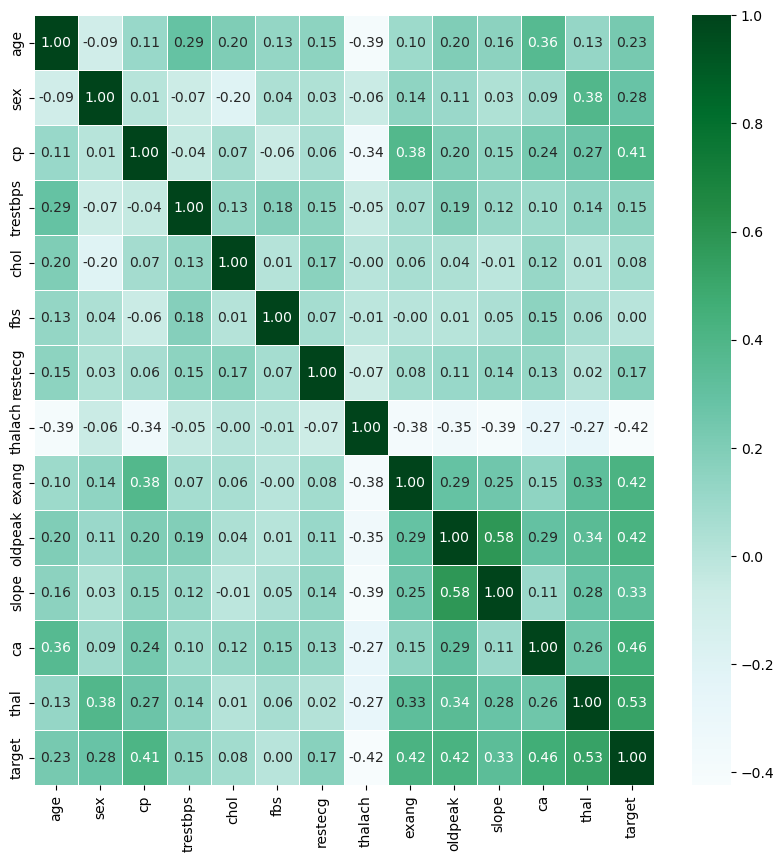

In [273]:
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,annot=True,linewidths=0.5,fmt='0.2f',cmap='BuGn')

In [274]:
correlation_matrix = df.corr().abs()['target']
threshold = 0.1
selected_features = correlation_matrix[correlation_matrix > threshold].index.drop('target')
selected_features

Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [275]:
X_train=X_train.loc[:,selected_features]
X_test=X_test.loc[:,selected_features]

# Logistic Regression

In [276]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [277]:
model.score(X_test,y_test)

0.9

In [278]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [279]:
confusion_matrix(y_test,ypred)

array([[39,  2],
       [ 4, 15]], dtype=int64)

In [280]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()

In [281]:
tn,fp,fn,tp

(39, 2, 4, 15)

In [282]:
precision_score(y_test,ypred)

0.8823529411764706

In [283]:
recall_score(y_test,ypred)

0.7894736842105263

In [284]:
f1_score(y_test,ypred)

0.8333333333333333

In [285]:
specificity=tn/(tn+fp)
specificity

0.9512195121951219

# Decision Tree

In [286]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [287]:
model.score(X_test,y_test)

0.7

In [288]:
ypred=model.predict(X_test)
ypred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [289]:
confusion_matrix(y_test,ypred)

array([[25, 16],
       [ 2, 17]], dtype=int64)

In [290]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(25, 16, 2, 17)

In [291]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.5151515151515151, 0.8947368421052632, 0.6538461538461537)

In [292]:
specificity=tn/(tn+fp)
specificity

0.6097560975609756

# SVM

In [293]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [294]:
model.score(X_test,y_test)

0.9

In [295]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [296]:
confusion_matrix(y_test,ypred)

array([[39,  2],
       [ 4, 15]], dtype=int64)

In [297]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(39, 2, 4, 15)

In [298]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.8823529411764706, 0.7894736842105263, 0.8333333333333333)

In [299]:
specificity=tn/(tn+fp)
specificity

0.9512195121951219

# Random Forest

In [300]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [301]:
model.score(X_test,y_test)

0.8333333333333334

In [302]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [303]:
confusion_matrix(y_test,ypred)

array([[34,  7],
       [ 3, 16]], dtype=int64)

In [304]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(34, 7, 3, 16)

In [305]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.6956521739130435, 0.8421052631578947, 0.761904761904762)

In [306]:
specificity=tn/(tn+fp)
specificity

0.8292682926829268

# NB

In [307]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [308]:
model.score(X_test,y_test)

0.9166666666666666

In [309]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [310]:
confusion_matrix(y_test,ypred)

array([[39,  2],
       [ 3, 16]], dtype=int64)

In [311]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(39, 2, 3, 16)

In [312]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.8888888888888888, 0.8421052631578947, 0.8648648648648649)

In [313]:
specificity=tn/(tn+fp)
specificity

0.9512195121951219

# MLP

In [314]:
model=MLPClassifier(max_iter=1000)
model.fit(X_train,y_train)

MLPClassifier(max_iter=1000)

In [315]:
model.score(X_test,y_test)

0.8666666666666667

In [316]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [317]:
confusion_matrix(y_test,ypred)

array([[37,  4],
       [ 4, 15]], dtype=int64)

In [318]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(37, 4, 4, 15)

In [319]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.7894736842105263, 0.7894736842105263, 0.7894736842105263)

In [320]:
specificity=tn/(tn+fp)
specificity

0.9024390243902439

# KNN

In [321]:
model=KNeighborsClassifier(n_neighbors=11)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [322]:
model.score(X_test,y_test)

0.5666666666666667

In [323]:
ypred=model.predict(X_test)
ypred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [324]:
confusion_matrix(y_test,ypred)

array([[23, 18],
       [ 8, 11]], dtype=int64)

In [325]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(23, 18, 8, 11)

In [326]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.3793103448275862, 0.5789473684210527, 0.45833333333333337)

In [327]:
specificity=tn/(tn+fp)
specificity

0.5609756097560976

# LDA

In [328]:
model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [329]:
model.score(X_test,y_test)

0.8833333333333333

In [330]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [331]:
confusion_matrix(y_test,ypred)

array([[38,  3],
       [ 4, 15]], dtype=int64)

In [332]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(38, 3, 4, 15)

In [333]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.8333333333333334, 0.7894736842105263, 0.8108108108108109)

In [334]:
specificity=tn/(tn+fp)
specificity

0.926829268292683

# XGBoost

In [335]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [336]:
model.score(X_test,y_test)

0.85

In [337]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [338]:
confusion_matrix(y_test,ypred)

array([[35,  6],
       [ 3, 16]], dtype=int64)

In [339]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(35, 6, 3, 16)

In [340]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.7272727272727273, 0.8421052631578947, 0.7804878048780488)

In [341]:
specificity=tn/(tn+fp)
specificity

0.8536585365853658

# ADABoost

In [342]:
model=AdaBoostClassifier()
model.fit(X_train,y_train)

AdaBoostClassifier()

In [343]:
model.score(X_test,y_test)

0.8333333333333334

In [344]:
ypred=model.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [345]:
confusion_matrix(y_test,ypred)

array([[36,  5],
       [ 5, 14]], dtype=int64)

In [346]:
tn, fp, fn, tp =confusion_matrix(y_test,ypred).ravel()
tn,fp,fn,tp

(36, 5, 5, 14)

In [347]:
precision_score(y_test,ypred),recall_score(y_test,ypred),f1_score(y_test,ypred)

(0.7368421052631579, 0.7368421052631579, 0.7368421052631579)

In [348]:
specificity=tn/(tn+fp)
specificity

0.8780487804878049